In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Alcohol_Sales.csv')

In [4]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


rename the columns of the df dataframe

In [5]:
df.columns=['Date','Sales']

In [6]:
df.drop('Date',axis=1,inplace=True)           #  we are droping gate column.

In [7]:
df['last_mon']=df['Sales'].shift(1)
df['2last_mon']=df['Sales'].shift(2)      # since our sales data depends on previous month sales, therefore we created 3 columns having those last month sales data.
df['3last_mon']=df['Sales'].shift(3)
df.dropna(inplace=True)                   # dropping the null values.

In [8]:
df

,Sales,last_mon,2last_mon,3last_mon
3,4564,4002.0,3458.0,3459.0
4,4221,4564.0,4002.0,3458.0
5,4529,4221.0,4564.0,4002.0
6,4466,4529.0,4221.0,4564.0
7,4137,4466.0,4529.0,4221.0
...,...,...,...,...
320,12396,14257.0,12640.0,14583.0
321,13914,12396.0,14257.0,12640.0
322,14174,13914.0,12396.0,14257.0
323,15504,14174.0,13914.0,12396.0


In [9]:
df.columns                      

Index(['Sales', 'last_mon', '2last_mon', '3last_mon'], dtype='object')

In [10]:
x1=df.loc[3:200][['last_mon', '2last_mon', '3last_mon']]    #from the dataset we are taking training dataset from index value 3 to 200 .
y1=df.loc[3:200]['Sales']

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()                                       # caliing the linear regression class 
lm.fit(x1,y1)                                               # caliing the fit function and passing the traing dataset


LinearRegression()

In [12]:
print(lm.intercept_)
print(lm.coef_)

440.4902197829897
[0.49650255 0.17032679 0.26849197]


we took testing values from the dataframe 'df' from index value 200 to 324

In [13]:
x5=df.loc[200:400][['last_mon','2last_mon',	'3last_mon']]

In [14]:
x5

,last_mon,2last_mon,3last_mon
200,9375.0,9553.0,9977.0
201,9225.0,9375.0,9553.0
202,9948.0,9225.0,9375.0
203,8758.0,9948.0,9225.0
204,10839.0,8758.0,9948.0
...,...,...,...
320,14257.0,12640.0,14583.0
321,12396.0,14257.0,12640.0
322,13914.0,12396.0,14257.0
323,14174.0,13914.0,12396.0


In [15]:
pred=lm.predict(x5)             # caliing the predict function from LR class and passing the test data

In [16]:
y=df.loc[200:400]['Sales']      # creating a list of 'sales' value from index value 200-400.
y

200     9225
201     9948
202     8758
203    10839
204     7266
       ...  
320    12396
321    13914
322    14174
323    15504
324    10718
Name: Sales, Length: 125, dtype: int64

earlier we created a  new dataframe df3 for taking the index value from 200 to 324 as wwe want to print our predicted values from 200 to 324.
"df3=df.loc[200:400,]" but we can also directly pick up the index value from 200_400.

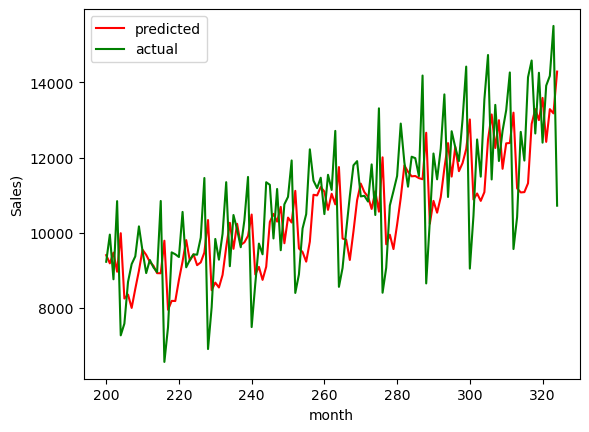

In [25]:
plt.plot(df.loc[200:400].index, pred,color='red',label='predicted')    #'df.loc[200:400].index'= used to access a subset of the DataFrame's index values from 200 to 400 (inclusive). It represents the x-axis values for the plot. it will plot the  predicted value stored in y vs/ index value.

plt.plot(y, color = 'green', label = 'actual')                         #it will plot the actuak values from index 200 to 340
plt.xlabel('month')
plt.ylabel('Sales)')
plt.legend()
